In [977]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")


In [978]:
df=pd.read_csv('covid_data.csv', usecols=['date', 'state', 'new_case', 'inpatient_beds_used', 'inpatient_beds_used_covid', 'tot_cases', 'Administered'])

In [979]:
df['date']=pd.to_datetime(df['date'])
mask=df['date']<=pd.to_datetime('2021-08-31')
df2=df[mask].copy()
mask=df2['date']>=pd.to_datetime('2020-03-28')
df3=df2[mask].copy()


In [980]:
dfny=df3[df3['state'] == 'NY']

In [981]:
dfny

,date,state,inpatient_beds_used,inpatient_beds_used_covid,tot_cases,new_case,Administered
34,2020-03-28,NY,3152.0,1294.0,22552,3315,0
86,2020-03-29,NY,3503.0,1630.0,25745,3193,0
138,2020-03-30,NY,10138.0,5007.0,29044,3299,0
190,2020-03-31,NY,18467.0,10251.0,32656,3612,0
242,2020-04-01,NY,19795.0,11029.0,36273,3617,0
...,...,...,...,...,...,...,...
26918,2021-08-27,NY,39804.0,2685.0,1232380,4223,24172138
26970,2021-08-28,NY,38506.0,2620.0,1235297,2917,24231410
27022,2021-08-29,NY,38071.0,2655.0,1238214,2917,24284397
27074,2021-08-30,NY,35153.0,2768.0,1240856,2642,24328502


In [982]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.base import clone

In [983]:
#dfny_train = dfny.sample(frac=.8, random_state=8675309).copy()
#dfny_test = dfny.drop(dfny.index).copy()


In [984]:
#reg = LinearRegression(copy_X=True)
#kfold = KFold(n_splits=5, shuffle=True, random_state=440)

In [985]:
#def mse(true, pred):
    #return np.sum(np.power(true-pred,2))/len(true)

In [986]:
#reg = LinearRegression(copy_X=True)

#reg.fit(dfny_train[['tot_cases','new_case', 'Administered']], dfny_train['inpatient_beds_used_covid'])

#errors = reg.predict(dfny_train[['tot_cases','new_case', 'Administered']]) - dfny_train['inpatient_beds_used_covid']

In [987]:
#sns.set(font_scale=1)
#plt.figure(figsize=(8,6))

#plt.scatter(reg.predict(dfny_train[['tot_cases','new_case', 'Administered']]), errors)

#plt.xlabel("Predicted", fontsize=16)
#plt.ylabel("Errors", fontsize=16)

#plt.show()

In [991]:

dfny_lag=dfny['Administered'].shift(14)
pd.set_option('display.max_rows', 50)

In [992]:
dfny = dfny.assign(Administered_lag=dfny_lag.values)

In [993]:
dfny

,date,state,inpatient_beds_used,inpatient_beds_used_covid,tot_cases,new_case,Administered,Administered_lag
34,2020-03-28,NY,3152.0,1294.0,22552,3315,0,NaN
86,2020-03-29,NY,3503.0,1630.0,25745,3193,0,NaN
138,2020-03-30,NY,10138.0,5007.0,29044,3299,0,NaN
190,2020-03-31,NY,18467.0,10251.0,32656,3612,0,NaN
242,2020-04-01,NY,19795.0,11029.0,36273,3617,0,NaN
...,...,...,...,...,...,...,...,...
26918,2021-08-27,NY,39804.0,2685.0,1232380,4223,24172138,23512414.0
26970,2021-08-28,NY,38506.0,2620.0,1235297,2917,24231410,23561203.0
27022,2021-08-29,NY,38071.0,2655.0,1238214,2917,24284397,23595998.0
27074,2021-08-30,NY,35153.0,2768.0,1240856,2642,24328502,23640655.0


In [994]:
mask=dfny['date']<=pd.to_datetime('2021-08-17')
dfny2=dfny[mask].copy()
mask=dfny2['date']>=pd.to_datetime('2020-04-11')
dfny3=dfny2[mask].copy()

In [995]:

dfny3

,date,state,inpatient_beds_used,inpatient_beds_used_covid,tot_cases,new_case,Administered,Administered_lag
762,2020-04-11,NY,22378.0,13361.0,82150,4022,0,0.0
814,2020-04-12,NY,22452.0,13443.0,85486,3336,0,0.0
866,2020-04-13,NY,24018.0,13909.0,88268,2782,0,0.0
918,2020-04-14,NY,25178.0,14126.0,91743,3475,0,0.0
970,2020-04-15,NY,25445.0,14067.0,95477,3734,0,0.0
...,...,...,...,...,...,...,...,...
26190,2021-08-13,NY,39885.0,2176.0,1196273,2574,23512414,22902722.0
26242,2021-08-14,NY,38516.0,2119.0,1198595,2322,23561203,22950250.0
26294,2021-08-15,NY,38163.0,2209.0,1200816,2221,23595998,22997841.0
26346,2021-08-16,NY,35542.0,2253.0,1202885,2069,23640655,23023551.0


In [972]:
for value in dfny3['Administered_lag']:
    value=int(value)
dfny3

,date,state,inpatient_beds_used,inpatient_beds_used_covid,tot_cases,new_case,Administered,Administered_lag
762,2020-04-11,NY,22378.0,13361.0,82150,4022,0,0.0
814,2020-04-12,NY,22452.0,13443.0,85486,3336,0,0.0
866,2020-04-13,NY,24018.0,13909.0,88268,2782,0,0.0
918,2020-04-14,NY,25178.0,14126.0,91743,3475,0,0.0
970,2020-04-15,NY,25445.0,14067.0,95477,3734,0,0.0
...,...,...,...,...,...,...,...,...
26190,2021-08-13,NY,39885.0,2176.0,1196273,2574,23512414,22902722.0
26242,2021-08-14,NY,38516.0,2119.0,1198595,2322,23561203,22950250.0
26294,2021-08-15,NY,38163.0,2209.0,1200816,2221,23595998,22997841.0
26346,2021-08-16,NY,35542.0,2253.0,1202885,2069,23640655,23023551.0


In [996]:
dfny3_train = dfny3.sample(frac=.8, random_state=8675309).copy()
dfny3_test = dfny3.drop(dfny3.index).copy()

In [997]:
reg = LinearRegression(copy_X=True)
kfold = KFold(n_splits=5, shuffle=True, random_state=440)

In [998]:
reg = LinearRegression(copy_X=True)

reg.fit(dfny3_train[['tot_cases','new_case', 'Administered_lag']], dfny3_train['inpatient_beds_used_covid'])

errors = reg.predict(dfny3_train[['tot_cases','new_case', 'Administered_lag']]) - dfny3_train['inpatient_beds_used_covid']

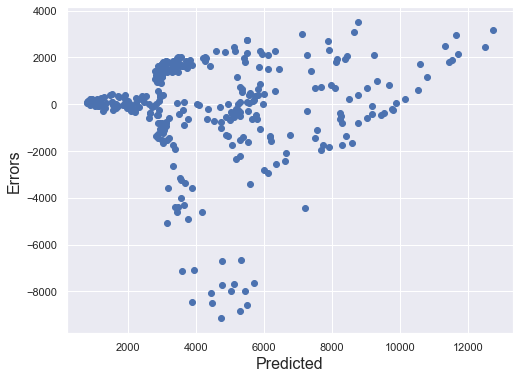

In [999]:
sns.set(font_scale=1)
plt.figure(figsize=(8,6))

plt.scatter(reg.predict(dfny3_train[['tot_cases','new_case', 'Administered_lag']]), errors)

plt.xlabel("Predicted", fontsize=16)
plt.ylabel("Errors", fontsize=16)

plt.show()

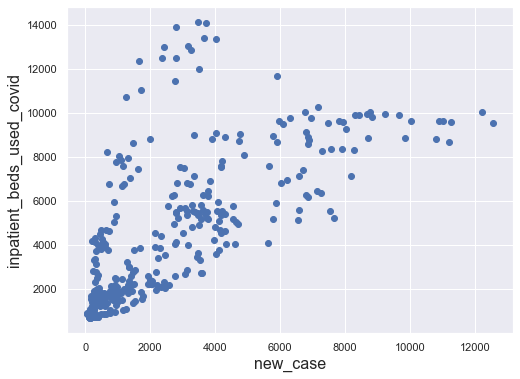

In [1004]:
plt.figure(figsize=(8,6))

plt.scatter(dfny3_train['new_case'], dfny3_train['inpatient_beds_used_covid'])

plt.xlabel("new_case", fontsize=16)
plt.ylabel("inpatient_beds_used_covid", fontsize=16)

plt.show()

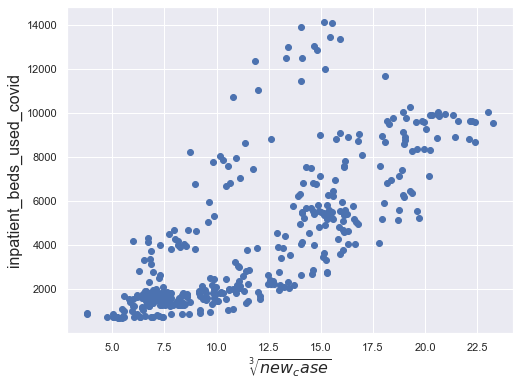

In [1010]:
plt.figure(figsize=(8,6))

plt.scatter(np.cbrt(dfny3_train['new_case']), dfny3_train['inpatient_beds_used_covid'])

plt.xlabel("$\sqrt[3]{new_case}$", fontsize=16)
plt.ylabel("inpatient_beds_used_covid", fontsize=16)

plt.show()